## Importing necessary libraries and data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Import the data
data = pd.read_csv(r"C:\Users\EZ FARMING\Desktop\Seun Personal Docs\DATA SCIENCE\PYTHON\EXPLORATIVE DATA ANALYSIS\SOLACE ONLINE CASE STUDY\sttdata.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [4]:
#Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
#Check for duplicates- Method 1
data.duplicated().sum()

0

In [6]:
#Check for duplicates- Method 2
data[data.duplicated()]

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content


In [7]:
#Check for numerical data
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [8]:
# There are no missing data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of content views look like?
2. What does the distribution of genres look like?
3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
4. How does the viewership vary with the season of release?
5. What is the correlation between trailer views and content views?

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Any other preprocessing steps (if needed)

In [9]:
#function that calculats and adds percentage to graph plots
def perc_plot(plot,feature):
    total = len(feature)
    for p in plot.patches:
        perc ='{:.1f}%'.format(100*p.get_height()/total)
        x= p.get_x() + p.get_width()/2 - 0.05
        y= p.get_y() + p.get_height()
        ax.annotate(perc, (x,y), size =12)
    plt.show()

## UNIVARIATE ANALYSIS

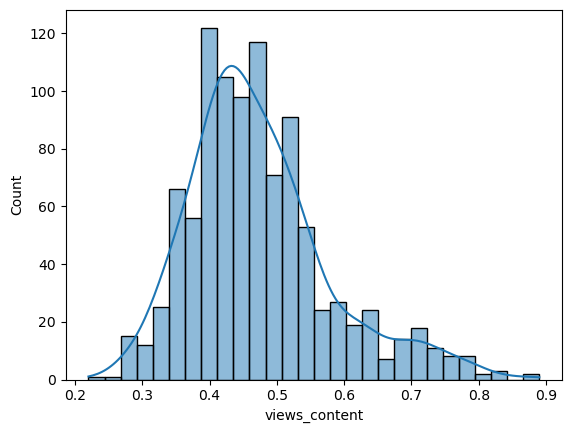

In [10]:
# Numerical analysis of dependant variables- 'view_content'
sb.histplot(data['views_content'], kde=True);

In [11]:
from scipy.stats import skew, kurtosis

print(data['views_content'].skew())
print(data['views_content'].kurtosis())

0.9428471566302183
1.0781309765492133


We can observe from our distribution above that the dependant variables fall under a normal distribution, though we can clearly detect the presence of some outliers.

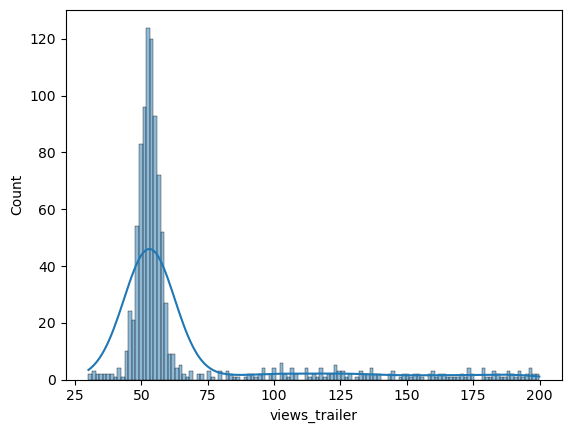

In [12]:
# Numerical analysis of dependant variables- 'view_trailer'
sb.histplot(data['views_trailer'], kde=True);

In [13]:
from scipy.stats import skew, kurtosis

print(data['views_trailer'].skew())
print(data['views_trailer'].kurtosis())

2.37291116913243
4.610648458456113


We can observe that the trailer is positively skewed, and we can easily make out the presence of outliers on both sides.

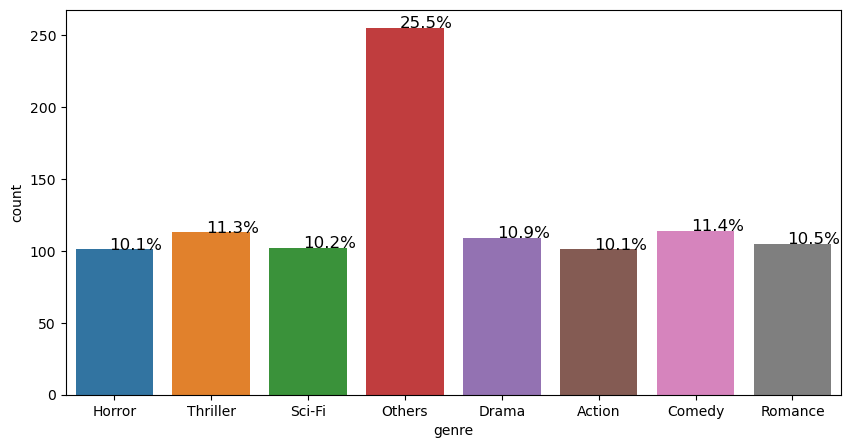

In [14]:
plt.figure(figsize=(10,5))
ax= sb.countplot(x='genre', data=data)
perc_plot(ax,data.genre)


Observation: We can observe that the datapoints are evenly spread across the different genres we have.
25% of the data set have an unidentified genre largely classified as others.

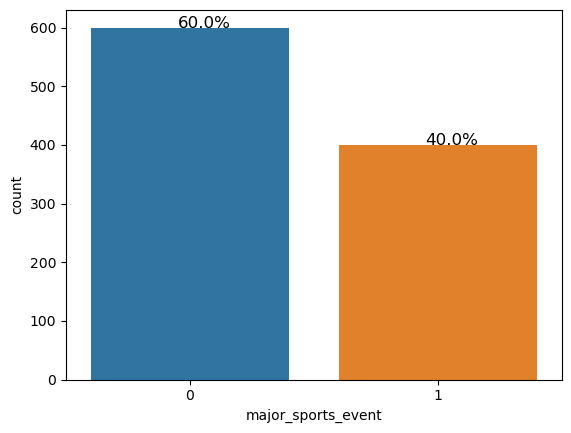

In [15]:
#Univariate distribution of the major sport event
ax = sb.countplot(x= 'major_sports_event', data=data)
perc_plot(ax,data['major_sports_event'])

## BIVARIATE ANALYSIS

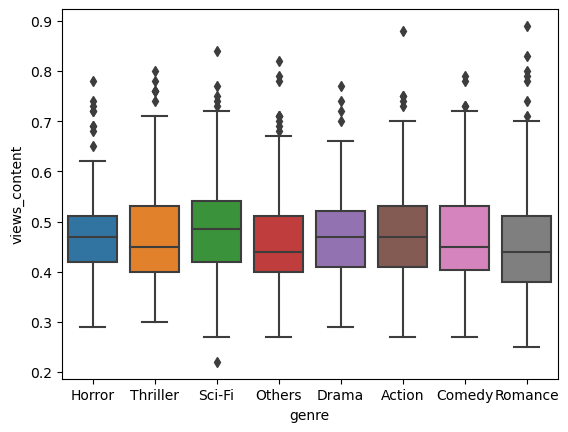

In [16]:
# Bivariate distribution examining the relationship between genre vs views_content
sb.boxplot( x='genre', y='views_content',data=data);

Observation:
From the plot above, we can see that the distribution for viewed Sci-Fi genre is higher than all other genres, closely followed by thriller, then horror and we have romance coming last. This goes to indicate the preference in content viewing behaviour.

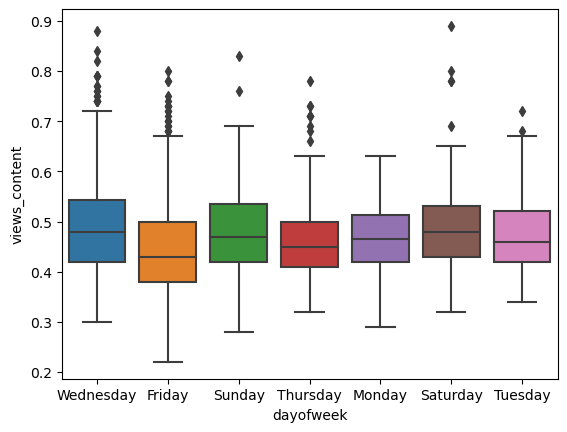

In [17]:
# Bivariate distribution examining the relationship between dayoftheweek vs views_content
sb.boxplot( x='dayofweek', y='views_content',data=data);

We can observe that the variation in viewership across content release days, and we can make out that eventhough doesn't seem to be highly significant, we can see that weekdays like wednesday, sunday and saturdays tend to have higher viewership than the rest.

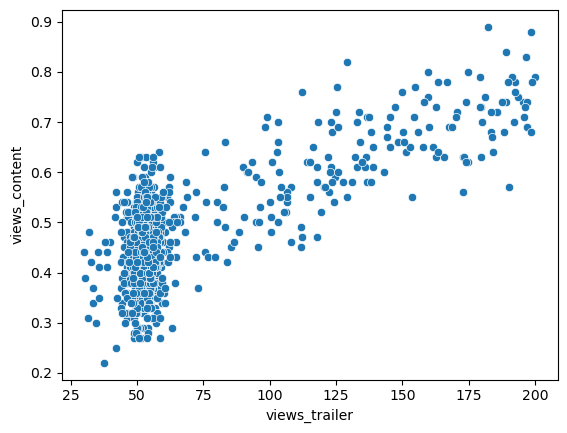

In [18]:
#exploring the relationship between the dependent variable and views_trailer 
sb.scatterplot(x='views_trailer', y='views_content', data=data);

We can see some form of linear relationship between the views trailer feature and our dependant variable. This sets the views trailer feature as a key predictor of the dependant variable.

## MULTIVARIATE ANALYSIS

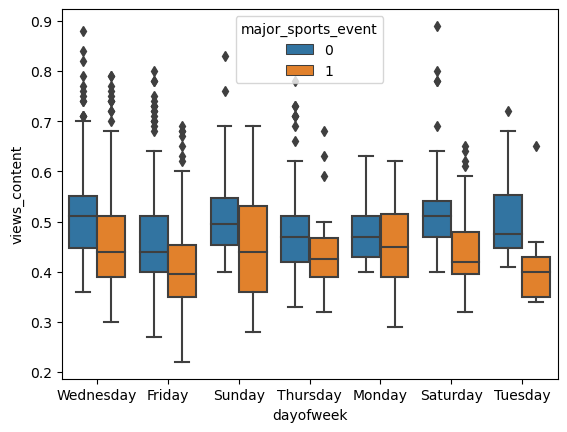

In [19]:
# Multivariate distribution examining the relationship between dayofthe week vs views_content vs major_sports_event
sb.boxplot( x='dayofweek', y='views_content', hue= 'major_sports_event', data=data);

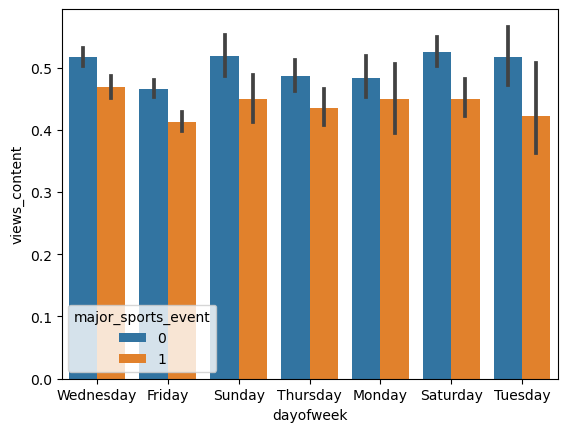

In [20]:
sb.barplot( x='dayofweek', y='views_content', hue= 'major_sports_event', data=data);

We can deduce from the data, that on average there is less content viewership on days, or whenever there is a major sport event

C:\Users\EZ FARMING\AppData\Local\Temp\ipykernel_2024\2744606997.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


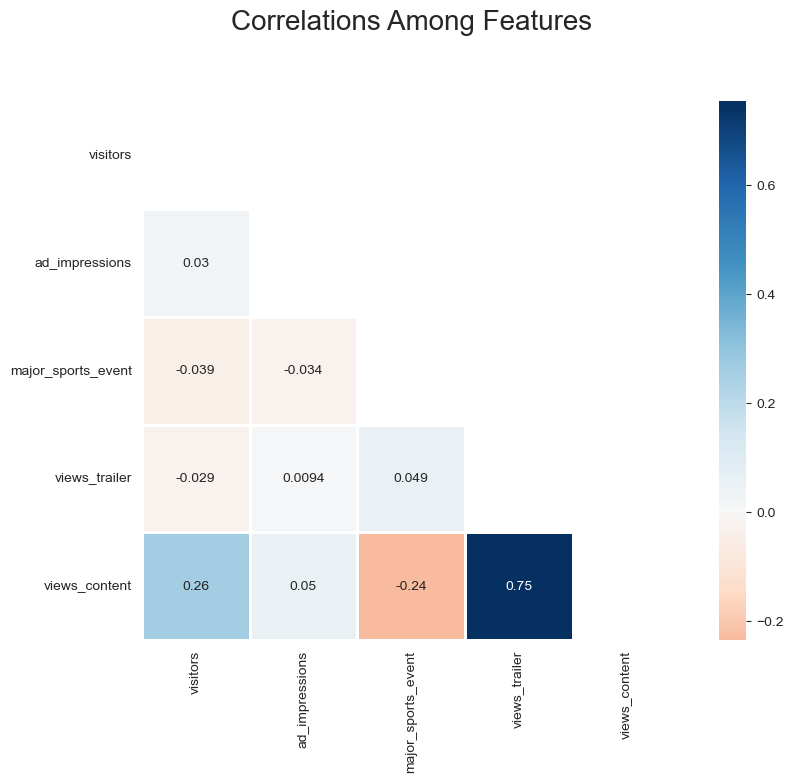

In [21]:
# heatmap is used to see the correlation between features
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sb.set_style('whitegrid')
plt.subplots(figsize = (10,7))
sb.heatmap(data.corr(),
          annot= True,
          mask = mask,
          cmap = 'RdBu',
          linewidths = .9,
          linecolor= 'white',
          fmt= '.2g',
          center = 0,
          square = True)
plt.title("Correlations Among Features", y= 1.03, fontsize = 20, pad =40);

We can observe from the correlation map above, the strenght of the relationship between the views_trailer and content viewership. 
There is also a negative correlation between major_sport_events and our dependent variable.

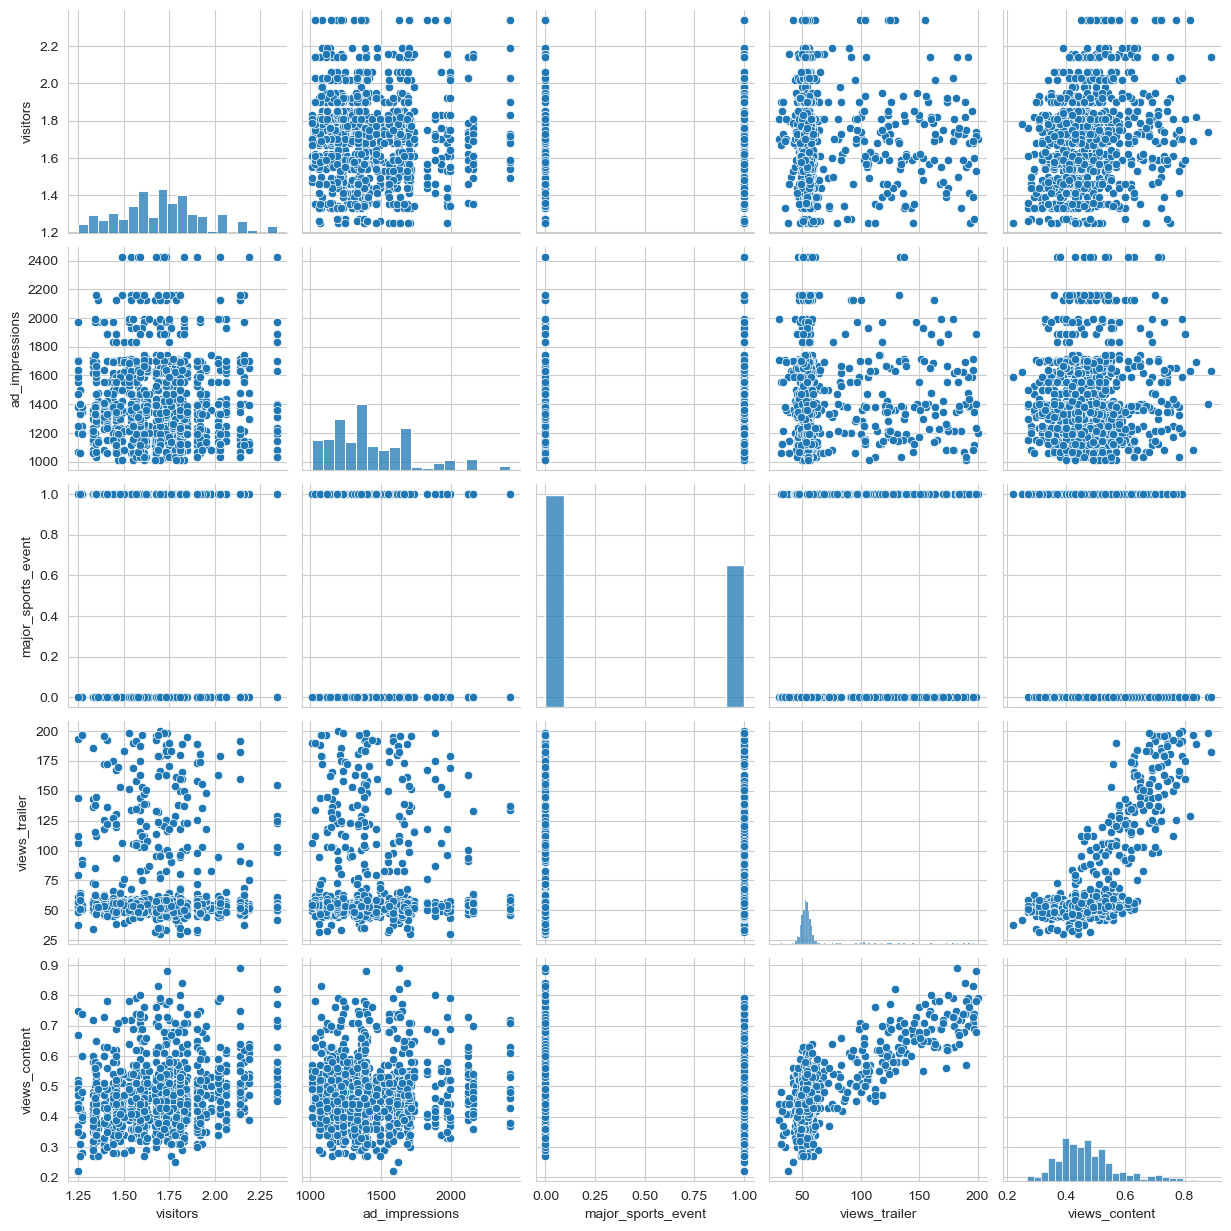

In [24]:
sb.pairplot(data);

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Actionable Insights and Recommendations

- Major Events observations on the data suggest that major sport event affect content viewership, as it drops whenever there's a major sports so a key recommendation will be to include a sport event genre among their contents, so they can boost viewership rate.

- 